# loading csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\births.csv")
print(df.head())


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


### Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.

In [7]:
df['Decade'] = (df['year'] // 10) * 10
print(df.head())


   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


### Show the descriptive statistics of the data.


In [9]:
df.describe(include="all")

,year,month,day,gender,births,Decade
count,15547.000000,15547.000000,15067.000000,15547,15547.000000,15547.000000
unique,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,F,NaN,NaN
freq,NaN,NaN,NaN,7776,NaN,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,NaN,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,NaN,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000,1980.000000


###  Check if your data contains any missing values

In [12]:
df.isnull().sum()


year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

###  What is the trend of male & female births every decade?


<Axes: title={'center': 'Trend of Male and Female Births Every Decade'}, xlabel='Decade', ylabel='Total Births'>

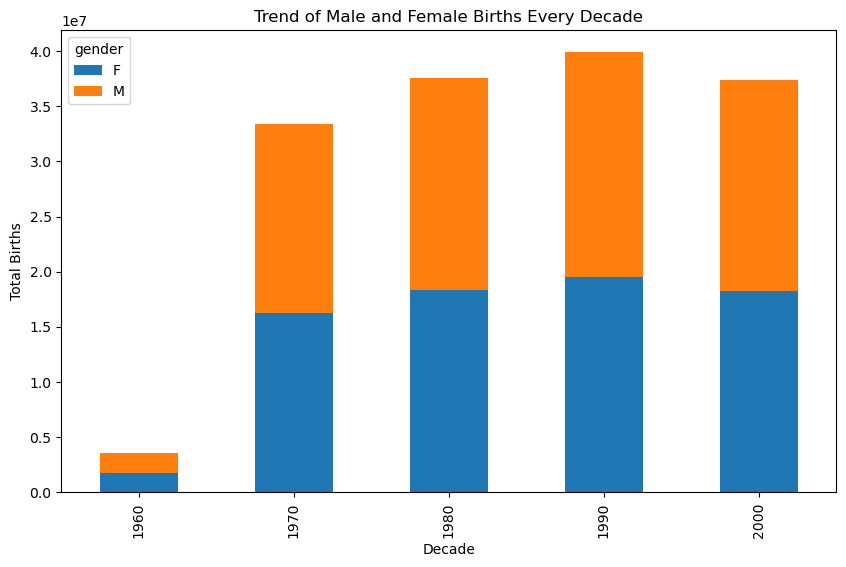

In [13]:
births_by_decade_gender = df.groupby(['Decade', 'gender'])['births'].sum().unstack()

births_by_decade_gender.plot(kind='bar', stacked=True, figsize=(10, 6), xlabel='Decade', ylabel='Total Births',
                             title='Trend of Male and Female Births Every Decade')

####  To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the centralnmtendency of the data while excluding extreme values

In [14]:
mean_births = df['births'].mean()
std_births = df['births'].std()

lower_limit = mean_births - 5 * std_births
upper_limit = mean_births + 5 * std_births

filtered_df = df[(df['births'] >= lower_limit) & (df['births'] <= upper_limit)]

print(filtered_df.head())

   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


### Plot births by weekday for several decades. Write down your observation.

   year month day
0  1969    01  01
1  1969    01  01
2  1969    01  02
3  1969    01  02
4  1969    01  03


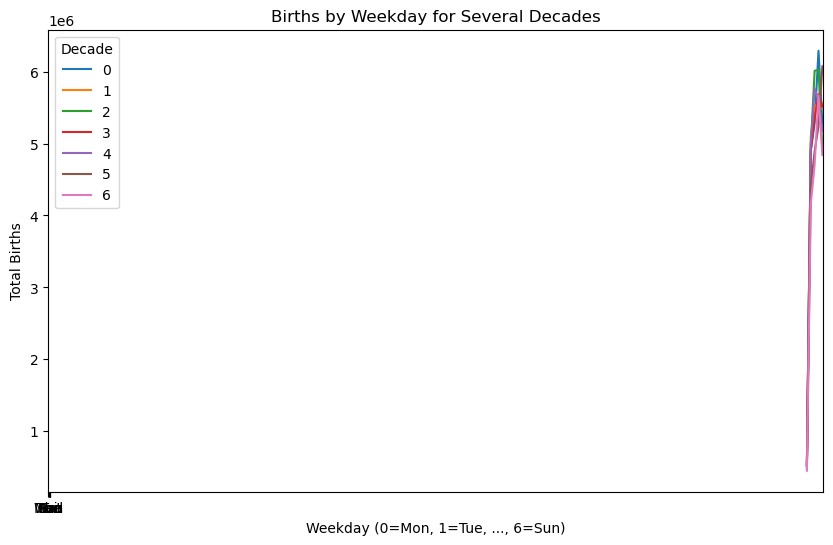

In [21]:

print(df[['year', 'month', 'day']].head())

df = df[df['year'].astype(str).str.isdigit() & df['month'].astype(str).str.isdigit() & df['day'].astype(str).str.isdigit()]

df['year'] = df['year'].astype(int).astype(str)
df['month'] = df['month'].astype(int).astype(str).str.zfill(2)
df['day'] = df['day'].astype(int).astype(str).str.zfill(2)

def parse_date(row):
    try:
        return pd.to_datetime(row['year'] + row['month'] + row['day'], format='%Y%m%d')
    except ValueError:
        return pd.NaT 

df['date'] = df.apply(parse_date, axis=1)

df.dropna(subset=['date'], inplace=True)

df['weekday'] = df['date'].dt.weekday

df['Decade'] = (df['year'].astype(int) // 10) * 10

births_by_decade_weekday = df.groupby(['Decade', 'weekday'])['births'].sum().unstack()

births_by_decade_weekday.plot(kind='line', figsize=(10, 6), xlabel='Weekday (0=Mon, 1=Tue, ..., 6=Sun)',
                              ylabel='Total Births', title='Births by Weekday for Several Decades')

plt.legend(title='Decade')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()





###  Group the data by month and day separately

In [23]:

births_by_month = df.groupby('month')['births'].sum()

births_by_day = df.groupby('day')['births'].sum()

print("Births by Month:")
print(births_by_month)

print("\nBirths by Day:")
print(births_by_day)

Births by Month:
month
01    12363794
02    11540346
03    12678333
04    12085349
05    12624590
06    12520408
07    13367074
08    13527495
09    13252018
10    12954129
11    12197205
12    12656204
Name: births, dtype: int64

Births by Day:
day
01    83568291
02     2303168
03     2309087
04     2286588
05     2296951
06     2308073
07     2314081
08     2322376
09     2315055
10     2327197
11     2319561
12     2322956
13     2290896
14     2335551
15     2333426
16     2332456
17     2335458
18     2334949
19     2331183
20     2337631
21     2329563
22     2317711
23     2305174
24     2290500
25     2283975
26     2300208
27     2314088
28     2328630
29     2189092
30     2141690
31     1341380
Name: births, dtype: int64


### Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

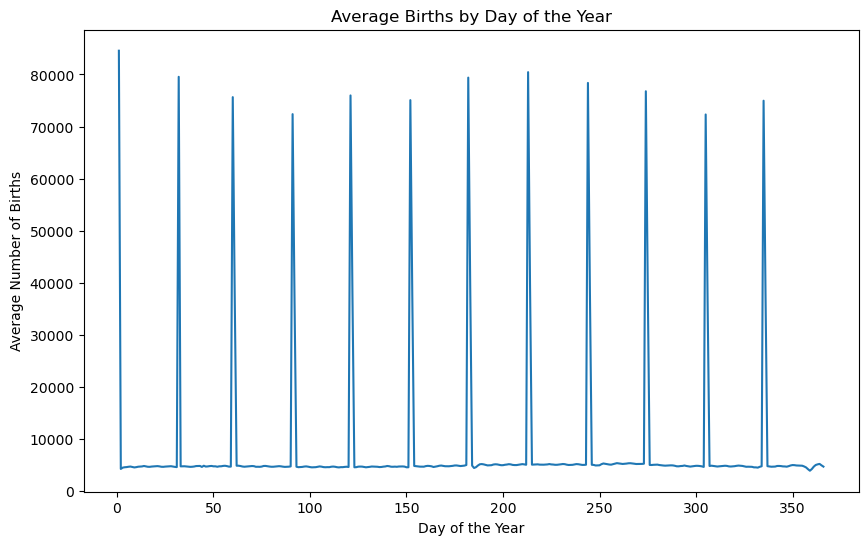

In [22]:

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['day_of_year'] = df['date'].dt.dayofyear

average_births_by_day_of_year = df.groupby('day_of_year')['births'].mean()

plt.figure(figsize=(10, 6))
average_births_by_day_of_year.plot(xlabel='Day of the Year', ylabel='Average Number of Births',
                                   title='Average Births by Day of the Year', legend=False)

plt.show()